In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./student-mat.csv', delimiter=';')
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [3]:
df['average_grade'] = df[['G1', 'G2', 'G3']].mean(axis=1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,average_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.666667


In [4]:
print(df[["studytime", "average_grade"]].describe())

        studytime  average_grade
count  395.000000     395.000000
mean     2.035443      10.679325
std      0.839240       3.696786
min      1.000000       1.333333
25%      1.000000       8.333333
50%      2.000000      10.666667
75%      2.000000      13.333333
max      4.000000      19.333333


In [5]:
df['studytime'].unique()

array([2, 3, 1, 4])

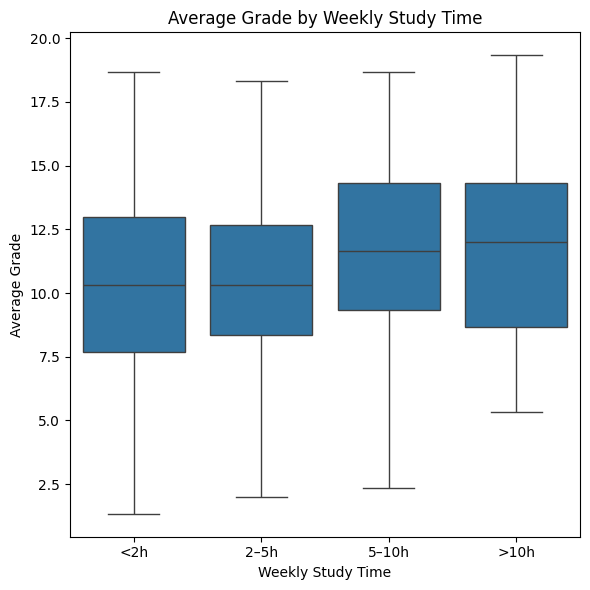

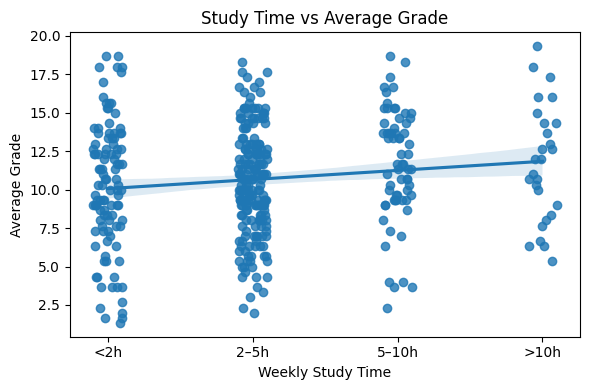

In [6]:
# Boxplot: Study Time vs Average Grade
plt.figure(figsize=(6, 6))
sns.boxplot(x="studytime", y="average_grade", data=df)
plt.title("Average Grade by Weekly Study Time")
plt.xlabel("Weekly Study Time")
plt.ylabel("Average Grade")
plt.xticks([0, 1, 2, 3], ["<2h", "2–5h", "5–10h", ">10h"])
plt.tight_layout()
plt.show()


# Scatter plot with trend line
plt.figure(figsize=(6, 4))
sns.regplot(x="studytime", y="average_grade", data=df, x_jitter=0.1)
plt.title("Study Time vs Average Grade")
plt.xlabel("Weekly Study Time")
plt.ylabel("Average Grade")
plt.xticks([1, 2, 3, 4], ["<2h", "2–5h", "5–10h", ">10h"])
plt.tight_layout()
plt.show()


In [7]:
# Optional: correlation
corr = df["studytime"].corr(df["average_grade"])
print(f"Correlation between studytime and average grade: {corr:.2f}")

Correlation between studytime and average grade: 0.13


In [8]:
df["mother_educated"] = df["Medu"] > 2
df["father_educated"] = df["Fedu"] > 2

In [9]:
both_educated = df[(df["mother_educated"]) & (df["father_educated"])]
only_mother = df[(df["mother_educated"]) & (~df["father_educated"])]
only_father = df[(~df["mother_educated"]) & (df["father_educated"])]
neither_educated = df[(~df["mother_educated"]) & (~df["father_educated"])]

# Print counts
print(f"Both parents educated: {len(both_educated)}")
print(f"Only mother educated: {len(only_mother)}")
print(f"Only father educated: {len(only_father)}")
print(f"Neither parent educated: {len(neither_educated)}")

Both parents educated: 166
Only mother educated: 64
Only father educated: 30
Neither parent educated: 135


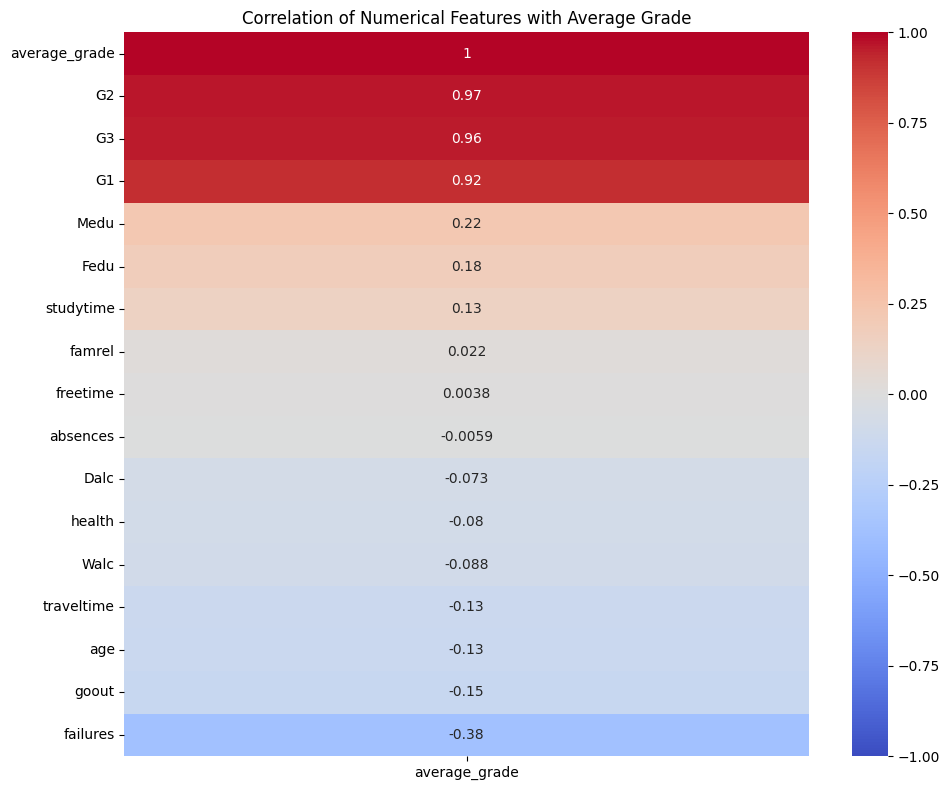

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Recreate average_grade if not already there
df["average_grade"] = (df["G1"] + df["G2"] + df["G3"]) / 3

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[["average_grade"]].sort_values(by="average_grade", ascending=False),
            annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation of Numerical Features with Average Grade")
plt.tight_layout()
plt.show()


In [11]:
df['age'].value_counts()

age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64

In [12]:
from scipy.stats import pearsonr

# Run Pearson correlation test
r, p_value = pearsonr(df["studytime"], df["average_grade"])

print(f"Pearson correlation coefficient (r): {r:.3f}")
print(f"P-value: {p_value:.4f}")

# Optional interpretation
if p_value < 0.05:
    print("There is a statistically significant correlation.")
else:
    print("No statistically significant correlation.")

Pearson correlation coefficient (r): 0.135
P-value: 0.0074
There is a statistically significant correlation.


In [13]:
from scipy.stats import spearmanr

# Run Spearman correlation test
rho, p_value = spearmanr(df["studytime"], df["average_grade"])

print(f"Spearman correlation coefficient (ρ): {rho:.3f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant monotonic relationship.")
else:
    print("No statistically significant monotonic relationship.")

Spearman correlation coefficient (ρ): 0.125
P-value: 0.0132
There is a statistically significant monotonic relationship.


In [14]:
import statsmodels.api as sm

# Define independent (X) and dependent (y) variables
X = df["studytime"]
y = df["average_grade"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Summary of results
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:          average_grade   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     7.248
Date:                Thu, 01 May 2025   Prob (F-statistic):            0.00740
Time:                        22:10:43   Log-Likelihood:                -1072.8
No. Observations:                 395   AIC:                             2150.
Df Residuals:                     393   BIC:                             2158.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4728      0.485     19.545      0.0

In [15]:
from scipy.stats import f_oneway

# Separate data into groups based on studytime
group1 = df[df["studytime"] == 1]["average_grade"]
group2 = df[df["studytime"] == 2]["average_grade"]
group3 = df[df["studytime"] == 3]["average_grade"]
group4 = df[df["studytime"] == 4]["average_grade"]

# Perform one-way ANOVA
f_stat, p_value = f_oneway(group1, group2, group3, group4)

print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference in average grades between at least two study time groups.")
else:
    print("No statistically significant difference in average grades between study time groups.")


F-statistic: 3.001
P-value: 0.0305
There is a statistically significant difference in average grades between at least two study time groups.


/tmp/ipykernel_43838/2976845373.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["studytime"] == i]["average_grade"], label=f"Group {i} ({['<2h', '2–5h', '5–10h', '>10h'][i-1]})", shade=True)
/tmp/ipykernel_43838/2976845373.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["studytime"] == i]["average_grade"], label=f"Group {i} ({['<2h', '2–5h', '5–10h', '>10h'][i-1]})", shade=True)
/tmp/ipykernel_43838/2976845373.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["studytime"] == i]["average_grade"], label=f"Group {i} ({['<2h', '2–5h', '5–10h', '>10h'][i-1]})", shade=True)
/tmp/ipykernel_43838/2976

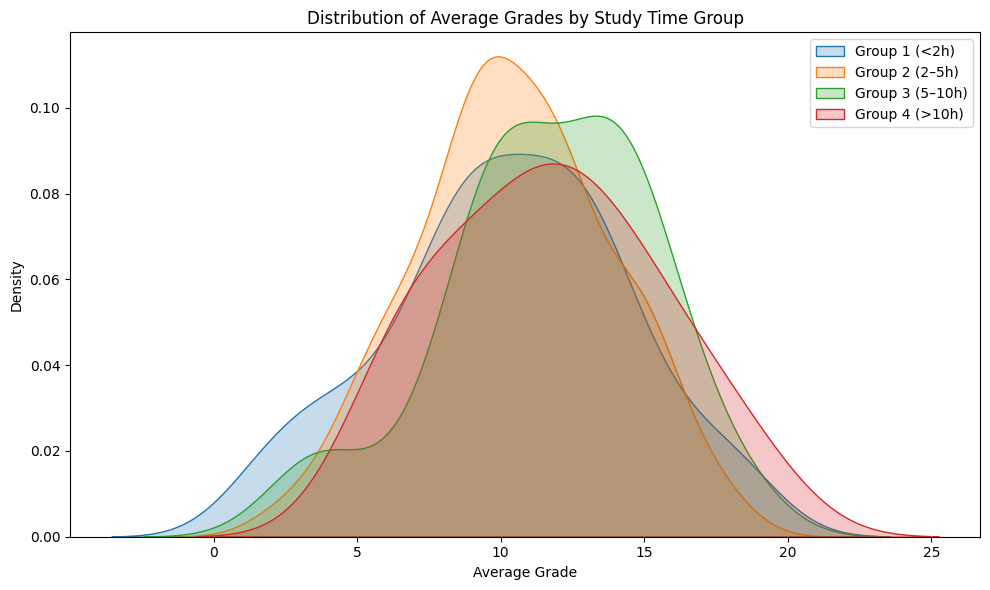

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot KDE for each group
for i in range(1, 5):
    sns.kdeplot(df[df["studytime"] == i]["average_grade"], label=f"Group {i} ({['<2h', '2–5h', '5–10h', '>10h'][i-1]})", shade=True)

plt.title("Distribution of Average Grades by Study Time Group")
plt.xlabel("Average Grade")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Create binary target
df["pass"] = df["average_grade"] >= 10

# Features and label
X = df[["studytime"]]
y = df["pass"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train logistic model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.00      0.00      0.00        30
        True       0.62      1.00      0.77        49

    accuracy                           0.62        79
   macro avg       0.31      0.50      0.38        79
weighted avg       0.38      0.62      0.47        79



/home/mpradhan007/anaconda3/envs/machine_learning_2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mpradhan007/anaconda3/envs/machine_learning_2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mpradhan007/anaconda3/envs/machine_learning_2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.